In [1]:

import Demo_Kpv
from Demo_Kpv import MAPE
import pandas as pd
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [2]:
kpv = Demo_Kpv.demo_K_PV()

Welcome to PVODataset (PVOD).


In [3]:
t1 = pd.to_datetime('2019/3/05 00:00')
t2 = pd.to_datetime('2019/3/10 00:00')
ori_data = kpv.select_daterange(station_id=5, start_date=t1, end_date=t2)
ori_data

,date_time,nwp_globalirrad,nwp_directirrad,nwp_temperature,nwp_humidity,nwp_windspeed,nwp_winddirection,nwp_pressure,lmd_totalirrad,lmd_diffuseirrad,lmd_temperature,lmd_pressure,lmd_winddirection,lmd_windspeed,power
0,2019-03-05 00:00:00,0.0,0.0,8.94,49.55,2.63,291.41,993.26,0,0,9.8,991.900024,231,0.6,0.0
1,2019-03-05 00:15:00,0.0,0.0,8.70,50.05,2.69,286.85,993.10,0,0,9.1,991.799988,153,0.6,0.0
2,2019-03-05 00:30:00,0.0,0.0,8.49,50.47,2.75,282.10,993.12,0,0,9.3,991.900024,154,0.7,0.0
3,2019-03-05 00:45:00,0.0,0.0,8.33,50.76,2.80,276.14,993.18,0,0,9.1,991.700012,156,0.5,0.0
4,2019-03-05 01:00:00,0.0,0.0,8.22,50.91,2.86,267.24,993.30,0,0,9.5,991.799988,175,0.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2019-03-09 23:00:00,0.0,0.0,7.85,39.34,3.40,281.28,995.63,0,0,7.7,996.000000,189,0.8,0.0
477,2019-03-09 23:15:00,0.0,0.0,7.66,39.65,3.48,281.15,995.80,0,0,7.9,995.900024,157,0.7,0.0
478,2019-03-09 23:30:00,0.0,0.0,7.49,39.96,3.51,281.33,996.00,0,0,7.8,995.799988,152,0.7,0.0
479,2019-03-09 23:45:00,0.0,0.0,7.34,40.26,3.53,280.68,996.22,0,0,8.1,995.799988,148,0.7,0.0


In [4]:
v_kpv, v_pdc, v_power, v_time =  kpv.range_calc_KPV(ori_data=ori_data, start=0, end=len(ori_data))
print(f"MAPE: {round(MAPE(v_power, v_pdc), 1)}% \nRMSE: {round(MSE(v_power, v_pdc)**0.5, 1)} \nMAE : {round(MAE(v_power, v_pdc), 1)}")

MAPE: 263.7% 
RMSE: 8.2 
MAE : 4.8


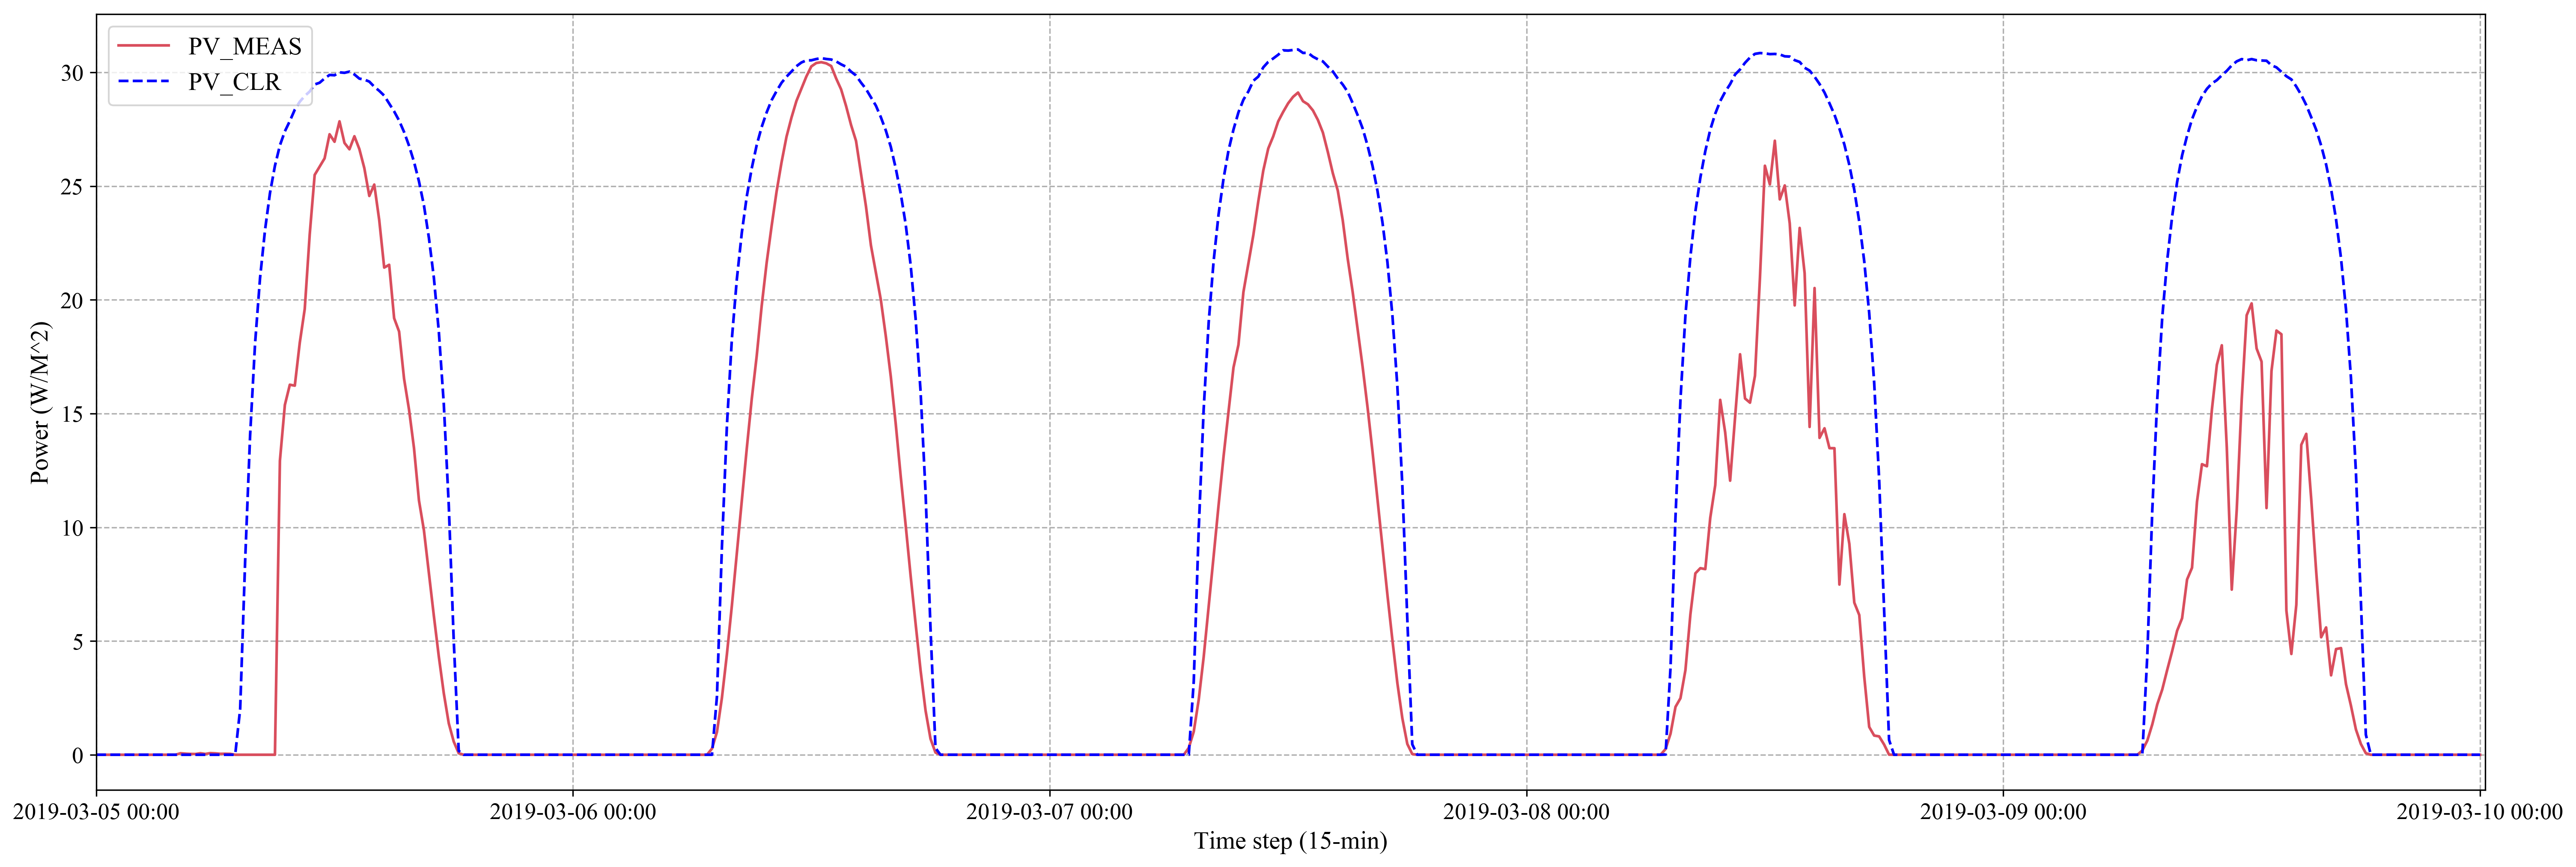

In [5]:
kpv.plot_clr(power=v_power, pltpdc=v_pdc, tmp_time=v_time, start=0, end=len(ori_data))

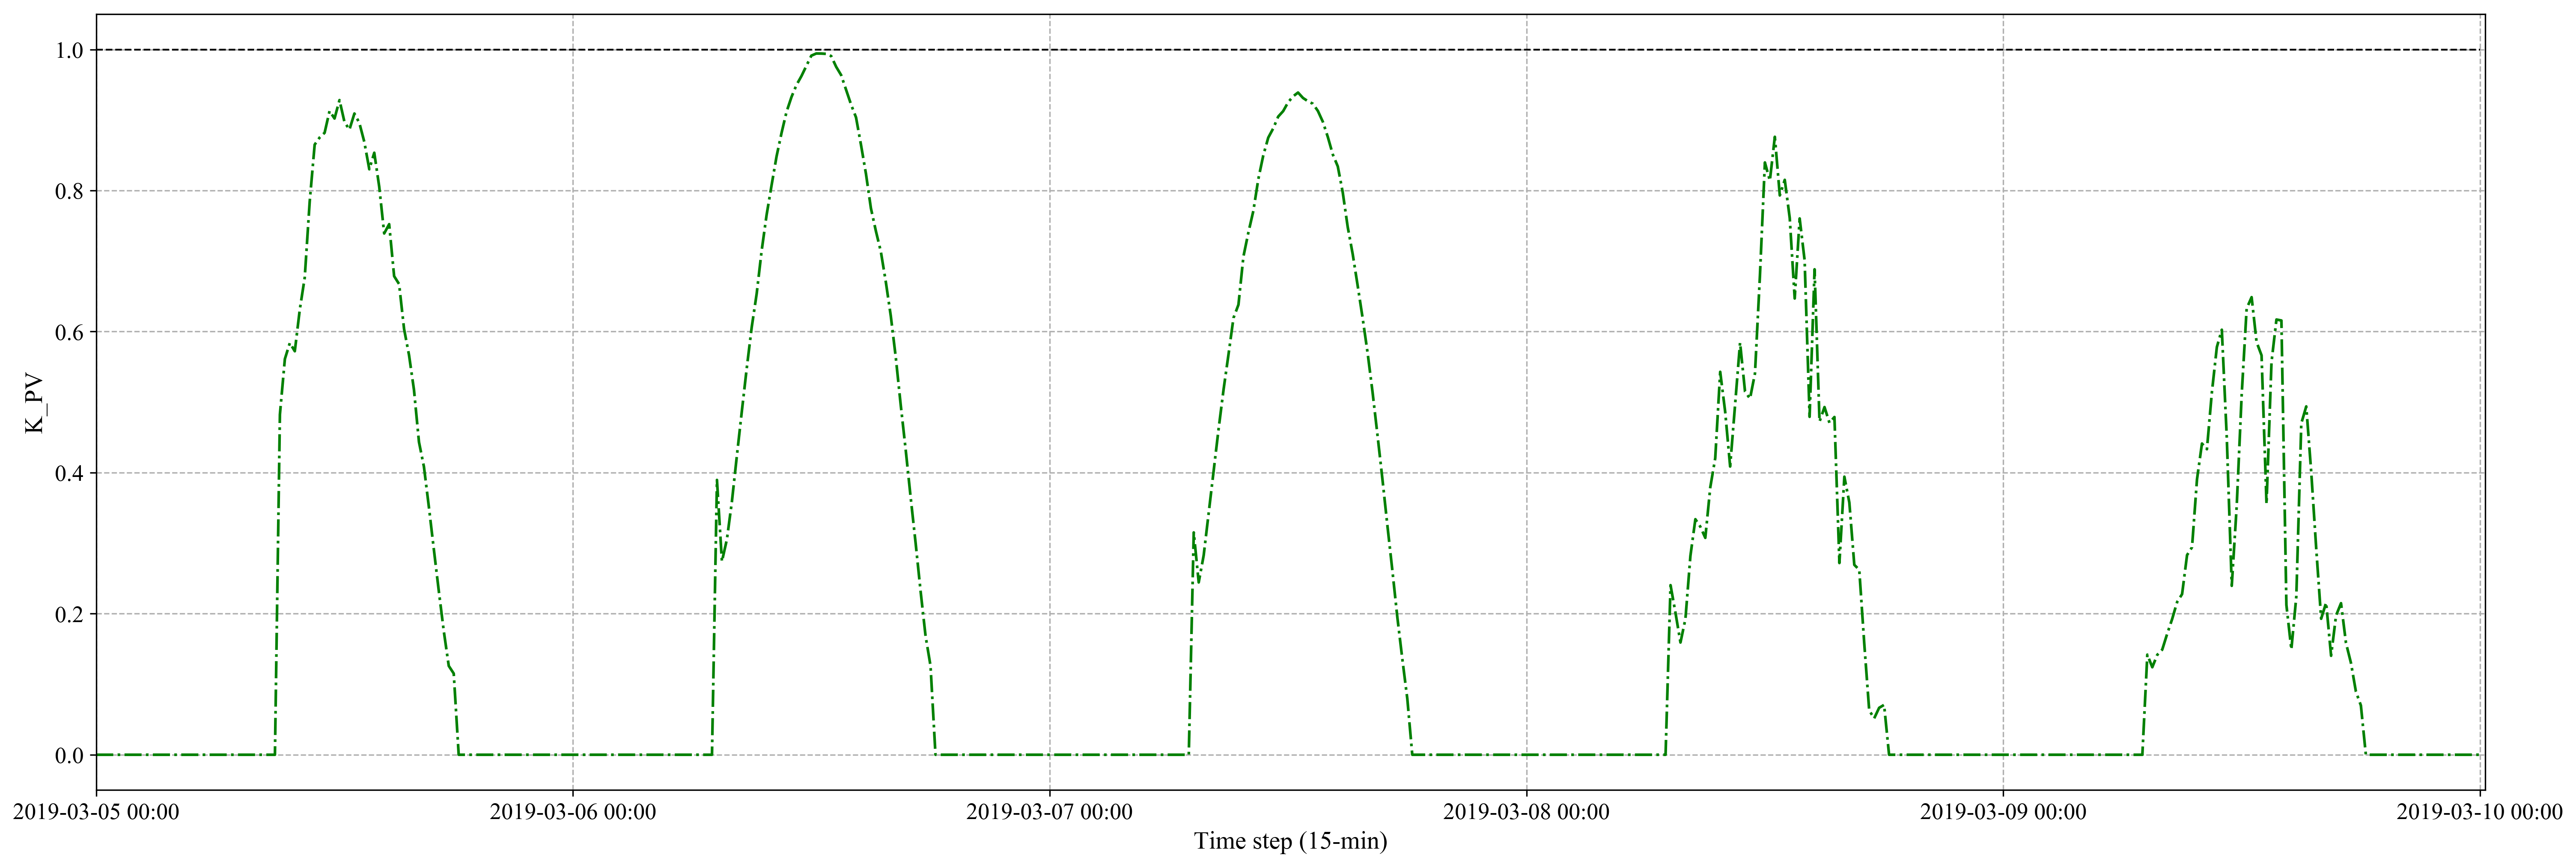

In [6]:
kpv.plot_kpv(K_pv=v_kpv, tmp_time=v_time, start=0, end=len(ori_data))